In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Regression

In [17]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, m).reshape(m,1)
y = X**2 + np.random.randn(m,1)

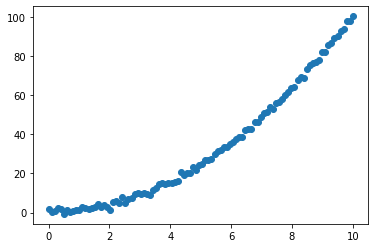

In [18]:
plt.scatter(X,y)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

C:\Users\Toufik\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


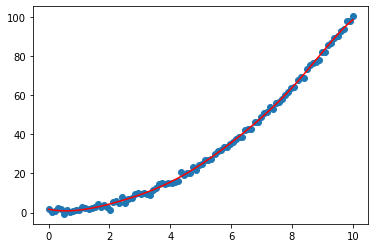

In [21]:
model = SVR(C=100)
model.fit(X,y)
model.score(X,y)

predictions = model.predict(X)

plt.scatter(X,y)
plt.plot(X,predictions, c='r')

# Classification

In [24]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0,1], inplace=True)
titanic.head()

<ipython-input-26-d866896ce24f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(axis=0, inplace=True)
C:\Users\Toufik\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
model = KNeighborsClassifier()

In [45]:
y = titanic['survived']
X = titanic.drop(['survived'], axis=1)

In [46]:
model.fit(X,y)
model.score(X,y)

0.8319327731092437

In [36]:
def survie(model, pclass=3, sex=0, age=23):
    x = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [37]:
survie(model)

[0]
[[1. 0.]]


# Exercice

In [50]:
def meilleur_KN():
    scores = []
    for i in range(1, 11):
        model = KNeighborsClassifier(i)
        y = titanic['survived']
        X = titanic.drop(['survived'], axis=1)
        model.fit(X,y)
        scores.append(model.score(X,y))
    
    print(scores)
    return scores.index(max(scores))
        

In [51]:
meilleur_KN()

[0.8473389355742297, 0.8585434173669467, 0.8585434173669467, 0.8403361344537815, 0.8319327731092437, 0.8221288515406162, 0.8207282913165266, 0.8109243697478992, 0.8179271708683473, 0.8053221288515406]


1